# Challenge DADOS Alura - Agosto 2022

##Alura Cash - Banco digital

### Semana 01

Caso ainda não tenha assistido ao vídeo do primeiro desafio, acesse o link da [**Semana 1**](https://www.alura.com.br/challenges/dados/semana-01-tratamento-de-dados)

----

**Boas-vindas!**

Você foi contratado(a) como pessoa cientista de dados para trabalhar em um banco digital internacional chamado **Alura Cash**. Na primeira reunião do seu novo trabalho, a diretoria financeira informa que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos. Portanto, é solicitada uma solução para que seja possível diminuir as perdas financeiras por conta de pessoas mutuarias que não quitam suas dívidas.

Como cientista de dados, você sugere um estudo das informações financeiras e de solicitação de empréstimo para encontrar padrões que possam indicar uma possível inadimplência.

Desse modo, você solicita um conjunto de dados que contenha as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuaria é inadimplente ou não. Com esses dados, você sabe que consegue modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

Por fim, você vai utilizar o **GitHub** e desenvolver um **portfólio** focado em Data Science, Data Analytics e Machine Learning.

# Importações

In [1]:
import pandas as pd
import numpy as np

# Datasets

## Leitura do arquivo CSV

In [2]:
uri = 'https://raw.githubusercontent.com/tarik-pomim/challenge_dados_082022/main/dados.csv'

In [3]:
dataset = pd.read_csv(uri)

## Avaliações iniciais do dataset

In [4]:
dataset.sample(10)

,person_id,loan_id,cb_id,person_id.1,person_age,person_income,person_home_ownership,person_emp_length,loan_id.1,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id.1,cb_person_default_on_file,cb_person_cred_hist_length
4881,T59KHm1Q-jZCy,4Fr4jMFB-75qS,AoA20Dqa-sMY2,T59KHm1Q-jZCy,30.0,115000.0,Mortgage,3.0,4Fr4jMFB-75qS,Debtconsolidation,D,20000.0,14.59,1.0,0.17,AoA20Dqa-sMY2,N,7
13706,W3sW95YZ-PfiP,Hlxvew1u-1laq,Mi2vJDiu-AwXd,W3sW95YZ-PfiP,23.0,24000.0,Rent,1.0,Hlxvew1u-1laq,Venture,B,5000.0,11.48,0.0,0.21,Mi2vJDiu-AwXd,N,4
5351,jU7TxT58-pZ0T,taPkd800-mTaq,poG1EU8h-ZTz5,jU7TxT58-pZ0T,24.0,156000.0,Mortgage,8.0,taPkd800-mTaq,Personal,B,15000.0,10.25,0.0,0.10,poG1EU8h-ZTz5,N,2
792,piczfiLk-B4dv,ijS2Kc62-eEyZ,hg0X557p-tHJZ,piczfiLk-B4dv,25.0,61000.0,Own,2.0,ijS2Kc62-eEyZ,Personal,C,15000.0,14.65,0.0,0.25,hg0X557p-tHJZ,N,2
7307,Do1hNGw4-oufd,aEjYkhHz-STwU,8JKRtx55-aNpL,Do1hNGw4-oufd,23.0,95000.0,Mortgage,1.0,aEjYkhHz-STwU,Homeimprovement,C,19800.0,13.22,1.0,0.21,8JKRtx55-aNpL,Y,3
2175,T7gRMl11-NBjq,NSABGGFZ-3xMT,yQF17KPj-s5fF,T7gRMl11-NBjq,24.0,100000.0,Mortgage,1.0,NSABGGFZ-3xMT,Debtconsolidation,A,6000.0,NaN,0.0,0.06,yQF17KPj-s5fF,N,3
11645,vikOGOHx-veZh,vggppasd-ozXt,vhRzpicK-wnSb,vikOGOHx-veZh,25.0,30000.0,Mortgage,2.0,vggppasd-ozXt,Personal,A,11500.0,8.59,0.0,0.38,vhRzpicK-wnSb,N,4
397,Ci85x6r5-W7st,SdiRIqwz-bl4b,CicwQQcF-Clrk,Ci85x6r5-W7st,24.0,85100.0,Rent,3.0,SdiRIqwz-bl4b,Education,C,15000.0,NaN,0.0,0.18,CicwQQcF-Clrk,Y,2
12293,KXhgZX5H-cfvS,4iwNSrzI-gu4y,WRn7YQNR-I5Dk,KXhgZX5H-cfvS,32.0,110000.0,Mortgage,16.0,4iwNSrzI-gu4y,Homeimprovement,A,6700.0,6.92,0.0,0.06,WRn7YQNR-I5Dk,N,7
5145,8MpngQBE-aanI,WAEb212y-YNxD,a8hZwtUj-ujRL,8MpngQBE-aanI,24.0,108288.0,Mortgage,5.0,WAEb212y-YNxD,Debtconsolidation,A,10000.0,8.49,0.0,0.09,a8hZwtUj-ujRL,N,2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_id                   14952 non-null  object 
 1   loan_id                     14952 non-null  object 
 2   cb_id                       14952 non-null  object 
 3   person_id.1                 14952 non-null  object 
 4   person_age                  14819 non-null  float64
 5   person_income               14809 non-null  float64
 6   person_home_ownership       14800 non-null  object 
 7   person_emp_length           14389 non-null  float64
 8   loan_id.1                   14952 non-null  object 
 9   loan_intent                 14844 non-null  object 
 10  loan_grade                  14828 non-null  object 
 11  loan_amnt                   14813 non-null  float64
 12  loan_int_rate               13384 non-null  float64
 13  loan_status                 147

## Remoção de features redundantes

In [6]:
dataset.drop(['person_id.1', 'loan_id.1', 'cb_id.1'], axis=1, inplace=True)

In [7]:
dataset.head()

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,bLi18O5K-31eI,HpY5JrYs-x2bv,dDoO2g97-yxWH,22.0,55000.0,Own,6.0,Education,B,25000.0,10.74,0.0,0.45,N,2
1,g4JfbgOc-WHOB,8Qhsx0cn-hx45,8SelGHyw-9ksb,31.0,76000.0,Rent,4.0,Homeimprovement,A,6000.0,7.49,0.0,0.08,N,5
2,xZjlTQmr-sX7I,0DEl6qTs-hfiQ,PTHgNlLP-XvtB,22.0,50000.0,Mortgage,0.0,Debtconsolidation,A,12800.0,5.79,0.0,0.26,N,2
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2
4,QCrl3MTd-8H85,Dy72mlJI-6TUS,u0KE1FJ7-gAEQ,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2


## Renomeando colunas para português

In [8]:
colunas_PtBr = {
    'person_id' : 'id_solicitante',
    'loan_id' : 'id_emprestimo',
    'cb_id' : 'id_historico',
    'person_age' : 'idade',
    'person_income' : 'salario_anual',
    'person_home_ownership' : 'situacao_imovel',
    'person_emp_length' : 'anos_empregado',
    'loan_intent' : 'motivo_emprestimo',
    'loan_grade' : 'pontuacao_emprestimo',
    'loan_amnt' : 'total_a_emprestar',
    'loan_int_rate' : 'juros',
    'loan_status' : 'possibilidade_inadimplencia',
    'loan_percent_income' : 'percentual_emprestimo_renda',
    'cb_person_default_on_file' : 'ja_foi_inadimplente',
    'cb_person_cred_hist_length' : 'anos_de_credito'
}

dataset.rename(mapper = colunas_PtBr, axis = 1, inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_solicitante               14952 non-null  object 
 1   id_emprestimo                14952 non-null  object 
 2   id_historico                 14952 non-null  object 
 3   idade                        14819 non-null  float64
 4   salario_anual                14809 non-null  float64
 5   situacao_imovel              14800 non-null  object 
 6   anos_empregado               14389 non-null  float64
 7   motivo_emprestimo            14844 non-null  object 
 8   pontuacao_emprestimo         14828 non-null  object 
 9   total_a_emprestar            14813 non-null  float64
 10  juros                        13384 non-null  float64
 11  possibilidade_inadimplencia  14795 non-null  float64
 12  percentual_emprestimo_renda  14812 non-null  float64
 13  ja_foi_inadimple

# Dicionário de dados

## Original

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
|`cb_id`|ID do histórico de cada solicitante|
| `person_age` | Idade da pessoa - em anos - que solicita empréstimo |
| `person_income` | Salário anual da pessoa solicitante |
| `person_home_ownership` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `person_emp_length` | Tempo - em anos - que a pessoa trabalhou |
| `loan_intent` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `loan_grade` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `loan_amnt` | Valor total do empréstimo solicitado |
| `loan_int_rate` | Taxa de juros |
| `loan_status` | Possibilidade de inadimplência |
| `loan_percent_income` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `cb_person_default_on_file` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `cb_person_cred_hist_length` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

## Português

| Feature | Característica |
| --- | --- |
|`id_solicitante`|ID da pessoa solicitante|
|`id_emprestimo`|ID da solicitação de empréstico de cada solicitante|
|`id_historico`|ID do histórico de cada solicitante|
| `idade` | Idade da pessoa - em anos - que solicita empréstimo |
| `salario_anual` | Salário anual da pessoa solicitante |
| `situacao_imovel` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `anos_empregado` | Tempo - em anos - que a pessoa trabalhou |
| `motivo_emprestimo` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `pontuacao_emprestimo` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `total_a_emprestar` | Valor total do empréstimo solicitado |
| `juros` | Taxa de juros |
| `possibilidade_inadimplencia` | Possibilidade de inadimplência |
| `percentual_emprestimo_renda` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `ja_foi_inadimplente` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `anos_de_credito` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

# Inconsistências

In [10]:
duplicados = dataset.duplicated()
print(f'O dataset contém {duplicados.sum()} informações duplicadas.')

O dataset contém 0 informações duplicadas.


In [11]:
nulos = dataset.isnull()
nulos.sum()

id_solicitante                    0
id_emprestimo                     0
id_historico                      0
idade                           133
salario_anual                   143
situacao_imovel                 152
anos_empregado                  563
motivo_emprestimo               108
pontuacao_emprestimo            124
total_a_emprestar               139
juros                          1568
possibilidade_inadimplencia     157
percentual_emprestimo_renda     140
ja_foi_inadimplente             161
anos_de_credito                   0
dtype: int64

Várias features apresentam valores nulos (NaN), que carecem de tratamento.

In [12]:
brancos = dataset.eq(' ').sum() + dataset.eq('').sum()
brancos

id_solicitante                 0
id_emprestimo                  0
id_historico                   0
idade                          0
salario_anual                  0
situacao_imovel                0
anos_empregado                 0
motivo_emprestimo              0
pontuacao_emprestimo           0
total_a_emprestar              0
juros                          0
possibilidade_inadimplencia    0
percentual_emprestimo_renda    0
ja_foi_inadimplente            0
anos_de_credito                0
dtype: int64

Não foram encontrados valores ou espaços sem preenchimento no dataset.

# Análise descartando valores nulos

## Novo dataset sem os NaN

Remove-se todas as linhas que contém valores nulos e realiza-se uma cópia para um novo dataset. Reorganiza-se o índice e avalia-se o resumo do novo dataset.

In [13]:
dados = dataset.dropna().copy()
dados.reset_index(drop=True, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_solicitante               12420 non-null  object 
 1   id_emprestimo                12420 non-null  object 
 2   id_historico                 12420 non-null  object 
 3   idade                        12420 non-null  float64
 4   salario_anual                12420 non-null  float64
 5   situacao_imovel              12420 non-null  object 
 6   anos_empregado               12420 non-null  float64
 7   motivo_emprestimo            12420 non-null  object 
 8   pontuacao_emprestimo         12420 non-null  object 
 9   total_a_emprestar            12420 non-null  float64
 10  juros                        12420 non-null  float64
 11  possibilidade_inadimplencia  12420 non-null  float64
 12  percentual_emprestimo_renda  12420 non-null  float64
 13  ja_foi_inadimple

In [14]:
dados.sample(5)

,id_solicitante,id_emprestimo,id_historico,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
11699,5PYYQrGb-kL7i,eKFBKFUg-EPMg,Y5h04JQz-UlnH,22.0,28800.0,Rent,6.0,Education,B,8000.0,11.49,0.0,0.28,N,2
6691,LdXgymEO-05eY,EA4tkJab-YWsO,WkTmqh1f-sFLQ,35.0,68231.0,Rent,3.0,Education,C,22400.0,12.99,1.0,0.33,Y,7
7988,iPrJTFcY-Bb62,2gaeA2kb-UIGH,X0zGytXJ-slXv,33.0,42230.0,Rent,1.0,Medical,A,5500.0,9.63,0.0,0.13,N,10
9879,lLe9qzjH-Q82z,bT8QcgxZ-daMM,sShrxbD5-jeXx,22.0,53000.0,Mortgage,0.0,Debtconsolidation,A,5025.0,7.49,0.0,0.09,N,3
3084,2deqBlvq-3Lts,JbYvh7pO-ysiE,4X45OJPq-W3fT,22.0,57500.0,Rent,1.0,Debtconsolidation,B,9100.0,11.49,0.0,0.16,N,4


## Alinhando Data Types

Transformando variáveis que estavam como ponto flutuante (float) em inteiro:

In [15]:
dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']] = dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']].astype({'idade' : 'int',
                                                                                                                                              'anos_empregado' : 'int',
                                                                                                                                              'possibilidade_inadimplencia' : 'int'},
                                                                                                                                             copy = False)

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_solicitante               12420 non-null  object 
 1   id_emprestimo                12420 non-null  object 
 2   id_historico                 12420 non-null  object 
 3   idade                        12420 non-null  int64  
 4   salario_anual                12420 non-null  float64
 5   situacao_imovel              12420 non-null  object 
 6   anos_empregado               12420 non-null  int64  
 7   motivo_emprestimo            12420 non-null  object 
 8   pontuacao_emprestimo         12420 non-null  object 
 9   total_a_emprestar            12420 non-null  float64
 10  juros                        12420 non-null  float64
 11  possibilidade_inadimplencia  12420 non-null  int64  
 12  percentual_emprestimo_renda  12420 non-null  float64
 13  ja_foi_inadimple

## Localizando inconsistencias e outliers nas features:

Avaliação de algumas descrições das variáveis:

In [17]:
dados.describe()

,idade,salario_anual,anos_empregado,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,anos_de_credito
count,12420.000000,1.242000e+04,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000
mean,27.712077,6.565723e+04,4.816828,9602.047101,11.034113,0.218277,0.169254,5.795491
std,6.262454,4.744951e+04,4.095568,6311.770379,3.229387,0.413093,0.105793,4.059610
min,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.560000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.938600e+04,7.000000,12250.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,1.200000e+06,34.000000,35000.000000,23.220000,1.000000,0.760000,30.000000


### idade

In [18]:
dados.idade.unique()

array([ 22,  31,  26,  24,  28,  35,  29,  27,  32,  36,  30,  25,  33,
        21,  23,  43,  47,  37,  34,  52,  54,  49,  38,  41, 144,  46,
        44,  40,  39,  45,  42,  48,  53,  55,  58,  50,  57,  56,  51,
        69,  64,  60,  59,  63,  62,  66,  20,  61,  70,  65,  73,  67])

In [19]:
dados.loc[dados['idade'] == 144]

,id_solicitante,id_emprestimo,id_historico,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
163,5fi1GWSO-oQcb,TmOA2QC6-xk2y,171BCjoL-pNcN,144,200000.0,Mortgage,4,Education,B,6000.0,11.86,0,0.03,N,2


Encontrado mutuário com supostos 144 anos de idade. Como não podemos concluir como o erro aconteceu, será optado por remover a linha:

In [20]:
dados.drop([163], inplace=True)

In [21]:
dados.iloc[161:165]

,id_solicitante,id_emprestimo,id_historico,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
161,AJuddx2B-Dcu9,D1szndL5-524v,pcIzPWkn-9TG1,34,120000.0,Rent,0,Debtconsolidation,A,2200.0,7.51,0,0.02,N,5
162,Ke9GAsjD-4ICN,OXFo4pfx-G9Rd,p25AZZxp-C9Dd,33,59000.0,Rent,17,Medical,B,9600.0,9.91,0,0.16,N,8
164,zjfoYKKD-w0MI,bkkFivp2-MCQn,qKflXH8K-hwKH,24,88000.0,Mortgage,2,Personal,A,8000.0,5.99,0,0.09,N,4
165,cesBt1ue-1gFP,GoixrHQv-KY16,Jy0XpP40-MxpS,26,85000.0,Rent,3,Homeimprovement,C,21000.0,13.92,0,0.25,N,3


### salario_anual

Avaliando a variável 'salario_anual' com duas visualizações.

Distribuição:

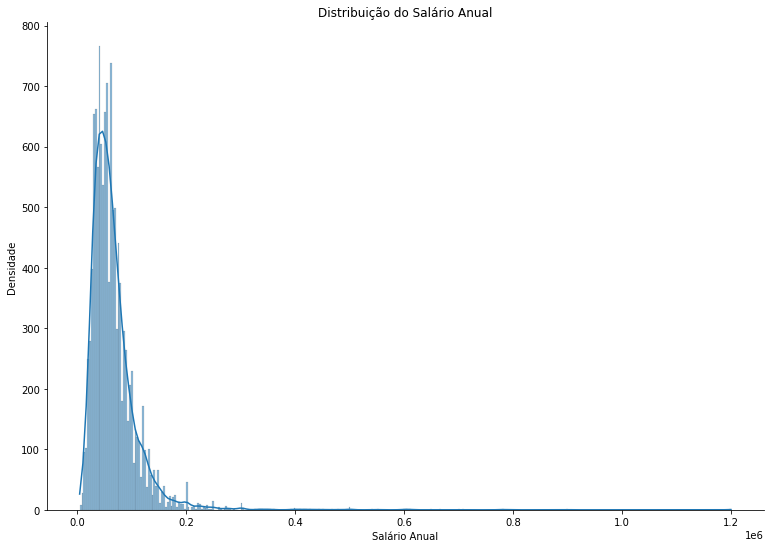

In [22]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

Box-plot:

In [23]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

Através das visualizações gráficas, consegue-se traçar um valor adequado para remoção dos outliers:

In [24]:
dados.loc[dados['salario_anual'] > 708000]

,id_solicitante,id_emprestimo,id_historico,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
1047,Ar7Oxvb7-rnkd,hWQNMz4h-v2Wp,XM3UmgFj-dvKF,58,780000.0,Mortgage,7,Personal,A,4500.0,6.91,0,0.01,N,20
1141,az7F1xnL-UL2H,96vWekFR-LYky,jZzZ0B9T-61wx,37,900000.0,Mortgage,5,Personal,C,25000.0,12.87,0,0.03,Y,13
3812,ewmv3lNA-tdBE,Gq6rlqeY-Z6wX,mz4kSDoN-0LjI,32,1200000.0,Mortgage,1,Venture,A,12000.0,7.51,0,0.01,N,8
7778,LFb7vx4w-ExT0,YkB2LWBD-vGlb,8xHEjTNt-J9lJ,36,1200000.0,Own,16,Medical,A,10000.0,6.54,0,0.01,N,11
11148,gyazrNi4-JlmT,1wULKeKh-I2Fu,aTE63UgZ-1K36,58,780000.0,Mortgage,7,Personal,A,4500.0,6.91,0,0.01,N,19


Removendo outliers do dataset:

In [25]:
dados.drop([1047, 1141, 3812, 7778, 11148], inplace=True)

Reavaliando visualizações gráficas:

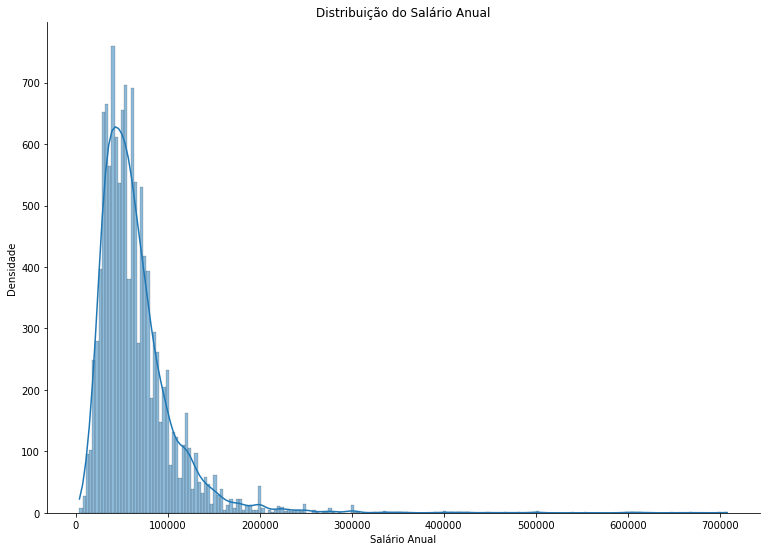

In [26]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

In [27]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

### situacao_imovel

In [28]:
dados['situacao_imovel'].unique()

array(['Own', 'Rent', 'Mortgage', 'Other'], dtype=object)

Variável 'situacao_imovel' apresenta boa integridade.

### anos_empregado

In [29]:
dados['anos_empregado'].unique()

array([ 6,  4,  0,  3,  5,  9,  8, 14, 11, 13, 12, 15,  2,  7,  1, 10, 23,
       17, 19, 22, 16, 21, 20, 27, 18, 24, 25, 26, 31, 34, 28, 30, 29])

Variável 'anos_empregado' apresenta boa integridade.

### motivo_emprestimo

In [30]:
dados['motivo_emprestimo'].unique()

array(['Education', 'Homeimprovement', 'Debtconsolidation', 'Medical',
       'Personal', 'Venture'], dtype=object)

Variável 'motivo_emprestimo' apresenta boa integridade.

### pontuacao_emprestimo

In [31]:
dados['pontuacao_emprestimo'].unique()

array(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype=object)

Variável 'pontuacao_emprestimo' apresenta boa integridade.

### total_a_emprestar

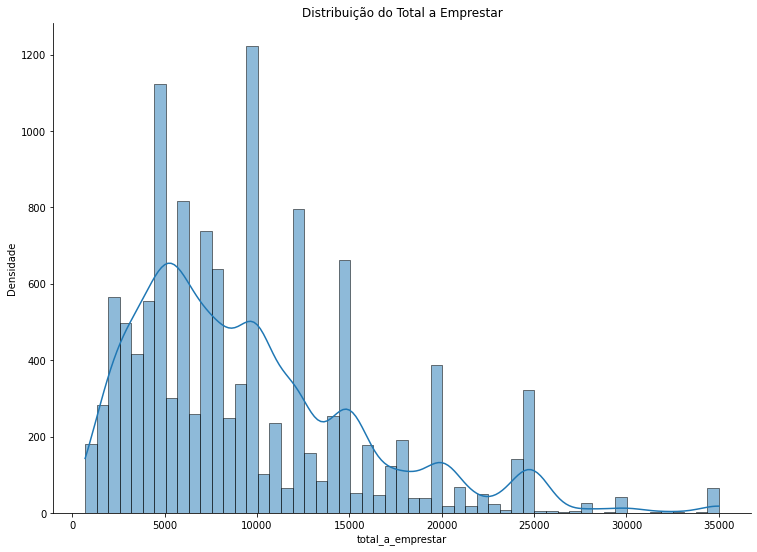

In [32]:
import seaborn as sns

ax = sns.displot(dados['total_a_emprestar'], kde= True)
ax.set(xlabel= 'total_a_emprestar', ylabel= 'Densidade', title= 'Distribuição do Total a Emprestar')
ax.figure.set_size_inches(12,8)

Variavel 'total_a_emprestar' apresenta boa integridade.

### juros

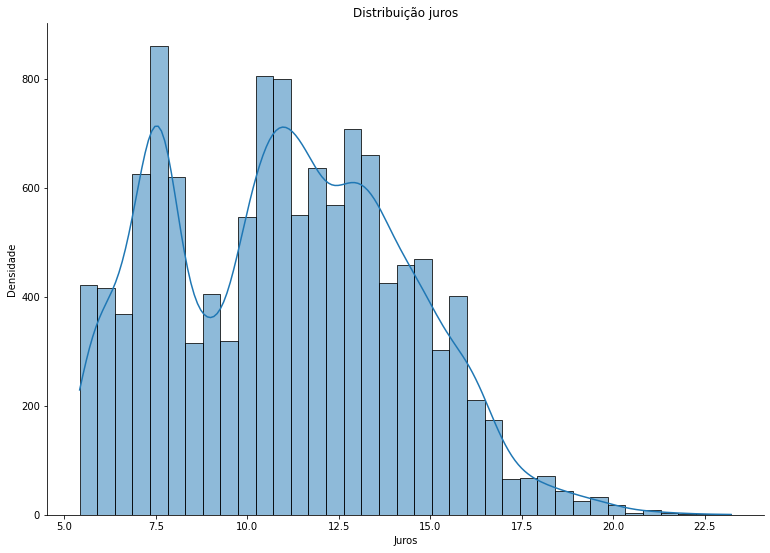

In [33]:
import seaborn as sns

ax = sns.displot(dados['juros'], kde= True)
ax.set(xlabel= 'Juros', ylabel= 'Densidade', title= 'Distribuição juros')
ax.figure.set_size_inches(12,8)

Variável 'juros' apresenta boa integridade.

### possibilidade_inadimplencia

In [34]:
dados['possibilidade_inadimplencia'].unique()

array([0, 1])

Variável 'possibilidade_inadimplencia' apresenta boa integridade.

### percentual_emprestimo_renda

In [35]:
dados['percentual_emprestimo_renda'].unique()

array([0.45, 0.08, 0.26, 0.11, 0.3 , 0.19, 0.36, 0.44, 0.34, 0.07, 0.13,
       0.12, 0.04, 0.1 , 0.23, 0.14, 0.37, 0.06, 0.31, 0.16, 0.27, 0.05,
       0.02, 0.09, 0.17, 0.38, 0.39, 0.42, 0.2 , 0.28, 0.22, 0.21, 0.24,
       0.25, 0.15, 0.01, 0.29, 0.18, 0.33, 0.48, 0.03, 0.5 , 0.35, 0.32,
       0.43, 0.4 , 0.59, 0.41, 0.61, 0.46, 0.52, 0.53, 0.47, 0.51, 0.57,
       0.54, 0.49, 0.63, 0.58, 0.71, 0.65, 0.6 , 0.62, 0.68, 0.55, 0.66,
       0.64, 0.76, 0.7 , 0.56, 0.67])

podemos cruzar esta variável com salario_anual? verificar


### ja_foi_inadimplente

In [36]:
dados['ja_foi_inadimplente'].unique()

array(['N', 'Y'], dtype=object)

### anos_de_credito

In [37]:
dados['anos_de_credito'].unique()

array([ 2,  5,  9,  4, 10,  8,  6,  3, 16,  7, 13, 12, 15, 11, 22, 26, 14,
       17, 28, 24, 23, 19, 25, 20, 29, 18, 27, 30, 21])

### Conclusão da avaliação das variáveis

Além das linhas com arquivos nulos, há uma linha na variável 'idade' com valor incoerente (144 anos), além de alguns outliers na variável 'salario_anual'. Após a remoção destas linhas, o índice é reorganizado mais uma vez no dataset 'dados' para dar início aos testes com modelos de machine learning.

In [38]:
dados.reset_index(drop=True, inplace=True)